<br/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="left"/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="right"/>
<div align="center">
<h2>Bootcamp Data Science - Módulo 3</h2><br/>
<h1>Introducción a Redes Neuronales y DeepLearning</h1>
<br/><br/>
    <b>Instructor Principal:</b> Jesús Ortiz jortiz@codingdojo.la<br/>
    <b>Instructor Asistente:</b> Daniela Blanco dblanco@codingdojo.la <br/><br/>
    <b>Coding Dojo</b>
</div>
<br>
Fuente: "Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow"

# Redes neuronales (Neural Networks - NN)

- Las Redes Neuronales son un conjunto de modelos de Machine Learning.
- Estas se inspiran en el funcionamiento neurológico del cerebro humano.
- Las redes neuronales han sido utilizadas en múltiples y diferentes áreas de aplicación

### Ejemplos de aplicaciones Deep Learning

- [DeepMind](https://www.youtube.com/watch?v=V1eYniJ0Rnk)
- [Gaugan2](http://gaugan.org/gaugan2/?text_input=ocean+waves+in+a+beach)
- [YoloV3](https://www.youtube.com/watch?v=MPU2HistivI)
- [QuickDraw](https://quickdraw.withgoogle.com/#)
- [Rock-Paper-Scisors](https://tenso.rs/demos/rock-paper-scissors/)
- [ChatGPT](https://chat.openai.com/)
- Y una laaaarga [lista](https://www.mygreatlearning.com/blog/deep-learning-applications/#deepdreaming)

# Perceptrón

- Es la red neuronal más sencilla cuya base es la TLU (Threshold Logic Unit)
- TLU es una neurona artificial que opera de la siguiente manera
    - Recibe una o varias entradas numéricas $(x_1, x_2, ..., x_n)$
    - Cada entrada es ponderada por un peso $(w_1x_1, w_2x_2, ..., w_nx_n)$
    - Se calcula la suma ponderada de las entradas $z=w_1x_1 + w_2x_2 + ... +w_nx_n $
    - Al resultado de la suma ponderada se le aplica una función escalonada $h_w(x)=\text{step}(z)$. Esta es nuestra predicción
- Al entrenar una neurona, lo que se intenta determinar son los **pesos** $w$ tales que la predicción $h_w(x)$ sea lo más cercana al valor real

<img src="images/perceptron.png" width="700px">

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

# iris = load_iris()
# X = iris.data[:,(2,3)] # Largo y ancho del pétalo
# y = (iris.target == 0) # Iris setosa?

cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

per = Perceptron()
per.fit(X_train, y_train)
print("Training score:", per.score(X_train, y_train))
print("Test score:", per.score(X_test, y_test))

Training score: 0.9271356783919598
Test score: 0.8830409356725146


In [4]:
from sklearn.linear_model import LogisticRegression
cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Comparación con Regresión Logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Training score:", logreg.score(X_train, y_train))
print("Test score:", logreg.score(X_test, y_test))


Training score: 0.9597989949748744
Test score: 0.9415204678362573


/Users/vn55le3/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Redes multicapas y Deep Learning

- Es posible conectar múltiples neuronas entre sí tomando la salida de una neurona como la entrada para una o múltiples neuronas adicionales.
- Las conexiones que se producen entre neuronas conforman lo que se llama como **red neuronal**.
- Dependiendo de cuales sean las conexiones entre distintas neuronas, se habla de la **arquitectura** de la red neuronal.
- Las redes neuronales se dividen en **capas**, las cuales se dividen en las siguientes categorías:
    - Capas de entrada (input layers)
    - Capas de salida (output layers)
    - Capas ocultas/intermedias (hidden layers)
- Las redes multicapas están compuestas por una capa de entrada, una o varias capas ocultas y una capa de salida
- Cuando una red multicapa contiene muchas capas ocultas, hablamos de una **Red Neuronal Profunda** (Deep Neural Network - DNN)

<img src="images/dnn.png" width="700px">

- Al igual que en el perceptron, deseamos calcular los pesos $w$ de todas las neuronas tales que la salida esté lo más cercana a los valores esperados. 
- ¿Cómo podemos calcular tantos pesos a la vez? 
    - **R:** Backpropagation (para quienes estén interesados en estudiar más a fondo, pueden buscar el algoritmo de Descenso del Gradiente/Gradient Descent)

# Bibliotecas de Deep Learning

- Actualmente existe una amplia gama de bibliotecas para Deep Learning. 
- Por su facilidad de uso y popularidad, utilizaremos la API de **Keras**, la cual viene incluida dentro de la biblioteca **Tensorflow**.
- Para poder utilizar Keras, es necesario tener previamente instalado Tensorflow (```pip install tensorflow```)

<img src="images/bibliotecas.png" width="700px">

# Creando redes neuronales en Keras

Para crear una red neuronal, debemos
- Definir la arquitectura de la red (modelo y capas)
- Compilar el modelo (selección de optimizador, función de pérdida y métricas)
- Entrenar modelo
- Usar!

In [5]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [7]:
# Ejemplo usando fashion mnist
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Cost",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] # 10 clases

X_train_full = X_train_full/255.0 # Escalamiento

In [9]:
28*28

784

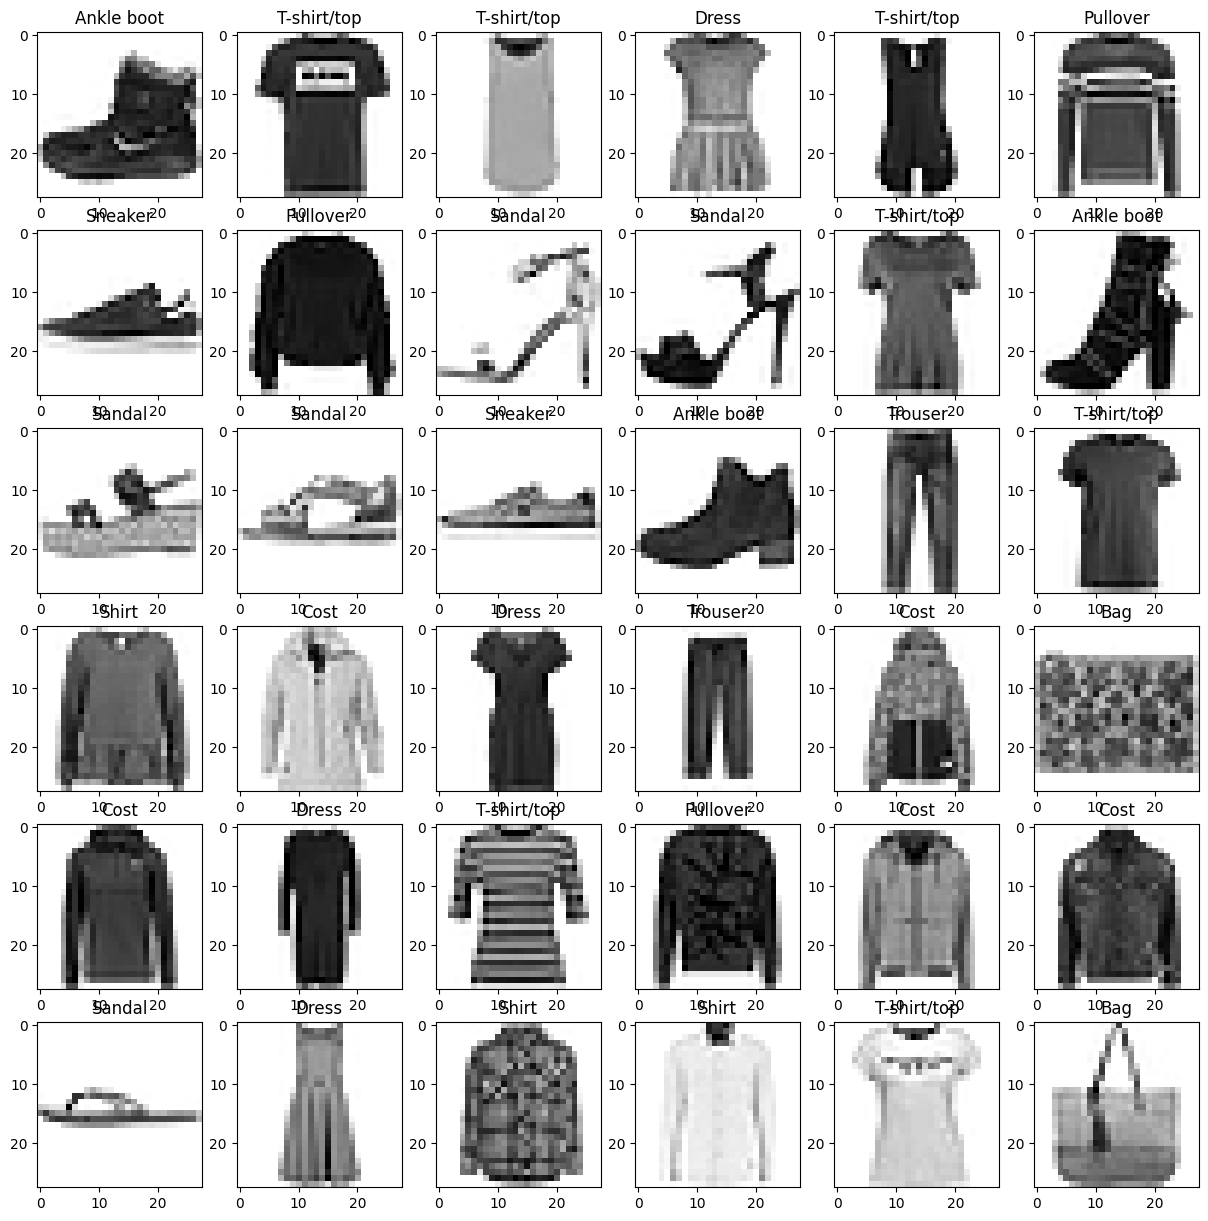

In [8]:
# Esta celda muestra algunas imágenes del dataset como ejemplo
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,15))

for i in range(36):
    ax = fig.add_subplot(6,6,i+1)
    ax.imshow(X_train_full[i], cmap='gist_yarg')
    ax.set_title(class_names[y_train_full[i]])

plt.show()
    

In [31]:
# Acá armaremos nuestra red neuronal (la arquitectura)
# Recuerda que en este punto se debe escoger tanto el modelo, la cantidad de capas, el tipo de capas,
# cantidad de neuronas, etc.
# Armado de nuestra red neuronal
model = tf.keras.models.Sequential() # Modelo secuencial

model.add(tf.keras.layers.Flatten(input_shape=[28, 28])) # Capa de entrada, tiene dimensiones 28x28
model.add(tf.keras.layers.Dense(500, activation='relu')) # Primera capa oculta, salida 300
model.add(tf.keras.layers.Dense(300, activation='relu')) # Primera capa oculta, salida 300
model.add(tf.keras.layers.Dense(100, activation='relu')) # Segunda capa oculta, salida 100
model.add(tf.keras.layers.Dense(60, activation='relu')) # Segunda capa oculta, salida 100
model.add(tf.keras.layers.Dense(10, activation='softmax')) # Capa de salida, salida 10 (número de clases)
# Importante 
# -Para un modelo de clasificación multiclase debes tener tantas neuronas en la capa de salida como clases tenga
# tu dataset
# - La función de activación DEBE ser softmax de la capa de salida

In [26]:
# Red creada
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 40)                4040      
                                                                 
 dense_6 (Dense)             (None, 10)                410       
                                                                 
Total params: 270050 (1.03 MB)
Trainable params: 270050 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# En el proceso de compilación, la función de perdida DEBE ser sparse_categorical_crossentropy
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd", # Existen principalmente dos optimizadores, adam y sgd. En la práctica, escoger uno u otro no hace gran diferencia
              metrics=["accuracy"])





# Ejemplos de métricas
# metrics=[tf.keras.metrics.Accuracy(), tf.keras.metrics.FalsePositives()]

In [28]:
from sklearn.model_selection import train_test_split
# Utilización de datos de validación y entrenamiento del modelo
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, 
                                                  stratify=y_train_full)

In [29]:
X_train_full.shape

(60000, 28, 28)

In [33]:
history = model.fit(X_train, y_train, epochs=100, batch_size=100,
                    validation_data=(X_val, y_val))

Epoch 1/100
480/480 [==============================] - 2s 4ms/step - loss: 1.0936 - accuracy: 0.6677 - val_loss: 0.6597 - val_accuracy: 0.7727
Epoch 2/100
480/480 [==============================] - 2s 3ms/step - loss: 0.5984 - accuracy: 0.7930 - val_loss: 0.5393 - val_accuracy: 0.8113
Epoch 3/100
480/480 [==============================] - 2s 3ms/step - loss: 0.5230 - accuracy: 0.8176 - val_loss: 0.5406 - val_accuracy: 0.8063
Epoch 4/100
480/480 [==============================] - 2s 3ms/step - loss: 0.4821 - accuracy: 0.8327 - val_loss: 0.4696 - val_accuracy: 0.8361
Epoch 5/100
480/480 [==============================] - 2s 3ms/step - loss: 0.4579 - accuracy: 0.8397 - val_loss: 0.4449 - val_accuracy: 0.8422
Epoch 6/100
480/480 [==============================] - 2s 3ms/step - loss: 0.4360 - accuracy: 0.8482 - val_loss: 0.4247 - val_accuracy: 0.8468
Epoch 7/100
480/480 [==============================] - 2s 3ms/step - loss: 0.4204 - accuracy: 0.8526 - val_loss: 0.4095 - val_accuracy: 0.8522

In [11]:
X_test = X_test/255.0 # nuevamente, escalamiento de set de datos de entrenamiento
loss, acc = model.evaluate(X_test, y_test,
                            batch_size=32)
print("Loss:", loss) # Función de pérdida
print("Accuracy:", acc)

313/313 [==============================] - 0s 983us/step - loss: 1.0358 - accuracy: 0.6907
Loss: 1.035835862159729
Accuracy: 0.6906999945640564


In [18]:
import numpy as np
#dato = 56
dato = 74
#dato=12
prediction = model.predict(X_test)
print(prediction[0])
classes_x=np.argmax(prediction,axis=1)
print("Predicción:", class_names[classes_x[dato]])
print("Clase Real:", class_names[y_test[dato]])

[0.00824354 0.00895627 0.00947858 0.00816452 0.0209657  0.16334893
 0.0125424  0.24407566 0.1676349  0.3565895 ]
Predicción: Cost
Clase Real: Pullover


# Regularización en NN

- La gran cantidad de parámetros que posee una red neuronal, si bien, entrega una gran flexbilidad de ajuste a una enorme cantidad de datos distintos, esto también las hace propensas al overfitting.
- Para evitar el overfitting, al igual en otros métodos, necesitamos utilizar técnicas de **regularización**.
- Algunas de las técnicas más populares son:
    - Regularización $l_1$ y $l_2$
    - Dropout (dilución)
    - Early stop (detención anticipada)

In [ ]:
# Ejercicio
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df = pd.read_csv('data/nba.csv', index_col = 'Name')
df.head()

In [ ]:
# Botar faltantes
df.dropna(inplace = True)
# Guardar X datos
X = df.drop(columns = 'TARGET_5Yrs')
# Codificar nuestro objetivo
y = df['TARGET_5Yrs']

In [ ]:
# División entrenamiento, validación, prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [ ]:
# Escalamiento
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Input shape
input_shape = X_train.shape[1]
print(input_shape)

In [ ]:
# Modelo sin regularización
model = Sequential()
# Primera capa oculta
model.add(Dense(19,
                input_dim = input_shape, 
                activation = 'relu')) 
model.add(Dense(10, 
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'bce', optimizer = 'adam', metrics=['accuracy']) # bce: binary cross entropy
history = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val), 
                    epochs=100)

In [ ]:
# Visualizar la perdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend();

In [ ]:
# Visualizar el accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend();

# Regularización $l_1$ y $l_2$

- Las regularización $l_1$ y $l_2$ agregan factores a la función de costo de una red neuronal para impedir que los pesos de esta tomen cualquier valor.
- Para agregar regularización a una capa, se debe utilizar lo siguiente

In [ ]:
from tensorflow.keras.regularizers import l2
# Con Regularización l2
# Modelo secuencial
model = Sequential()
# Primera capa oculta
model.add(Dense(19, # Cuántas neuronas tienes en tu primera capa oculta
                input_dim = input_shape, # ¿Cuál es la forma de tus características de entrada (número de columnas)?
                activation = 'relu',
                kernel_regularizer=l2(0.01))) # ¿Qué función de activación estás usando?
model.add(Dense(10, 
                activation = 'relu',
                kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam', metrics=['accuracy'])
history_l2 = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val), 
                    epochs=100)

In [ ]:
plt.plot(history_l2.history['loss'], label='Train loss')
plt.plot(history_l2.history['val_loss'], label='Val Loss')
plt.legend();

# Dropout

- Un algoritmo sencillo que ha mostrado ser muy efectivo al entrenar redes neuronales
- En cada iteración de entrenamiento, cada neurona (excepto las neuronas de salida) tiene una probabilidad $p$ de ser **excluída** (ignorada).
- La probabilidad $p$ es llamada **tasa de dropout**. Por lo general esta tasa se escoge como:
    - Entre 40%-50% para redes convolucionales
    - Entre 20%-30% para redes recurrentes
    - Para otras redes, se puede escoger valores entre el 10% hasta el 50%

In [ ]:
from tensorflow.keras.layers import Dropout
# Con Dropout
# Modelo secuencial
model = Sequential()
# Primera capa oculta
model.add(Dense(19, # Cuántas neuronas tienes en tu primera capa oculta
                input_dim = input_shape, # ¿Cuál es la forma de tus características de entrada (número de columnas)?
                activation = 'relu')) # ¿Qué función de activación estás usando?
# A continuación agregamos nuestra capa de dropout
model.add(Dropout(.3))
model.add(Dense(10, 
                activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam', metrics=['accuracy'])
history_dropout = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val), 
                    epochs=100)

In [ ]:
plt.plot(history_dropout.history['loss'], label='Train loss')
plt.plot(history_dropout.history['val_loss'], label='Val Loss')
plt.legend();

# Early stop (detención temprana)

- Para algoritmos iterativos que tienden al overfitting, el early stopping propone dejar de entrenar tan pronto se alcanza el mínimo error. 
- En el ejemplo se ve que el error de validación aumenta en la medida que aumentan los epochs. Early stop mantendrá aquel modelo que entrega el menor error de validación.

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend();

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# Con detención anticipada
# Modelo secuencial
model = Sequential()
# Primera capa oculta
model.add(Dense(19, # Cuántas neuronas tienes en tu primera capa oculta
                input_dim = input_shape, # ¿Cuál es la forma de tus características de entrada (número de columnas)?
                activation = 'relu')) # ¿Qué función de activación estás usando?
model.add(Dense(10, 
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam', metrics=['accuracy'])
early_stopping = EarlyStopping(patience = 5) # Número de iteraciones sin mejora antes de parar el entrenamiento
history_earlystop = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=100,
                    callbacks = [early_stopping])

In [ ]:
plt.plot(history_earlystop.history['loss'], label='Train loss')
plt.plot(history_earlystop.history['val_loss'], label='Validation Loss')
plt.legend();

# Redes Neuronales Recurrentes (RNN-Recurrent Neural Networks)

- Hasta el momento hemos trabajado con redes FeedForward, donde las activaciones fluyen en una dirección: desde la capa de entrada a la capa de salida.
- Las redes neuronales recurrentes son similares a las redes FeedForward, salvo que también existen conexiones en el sentido inverso.
- Las redes neuronales recurrentes son utilizadas generalmente para procesar secuencias de datos temporalmente relacionados, pues toman en cuenta lo que ocurrió previamente
- Algunas arquitecturas de redes recurrentes:
    - Long Short Term Memory (LSTM)
    - Gated Recurrent Unit (GRU)

# Ejemplo de LSTM

In [1]:
# Dataset de manchas solares disponible en https://github.com/jbrownlee/Datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

df = pd.read_csv('data/sunspots.csv', 
                 index_col = 'Date')
df = df.drop(columns=['id'])
df.rename(columns={'Monthly Mean Total Sunspot Number': 'sunspots'}, inplace=True)
df.head()

,sunspots
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3265 entries, 1749-01-31 to 2021-01-31
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sunspots  3265 non-null   float64
dtypes: float64(1)
memory usage: 180.1+ KB


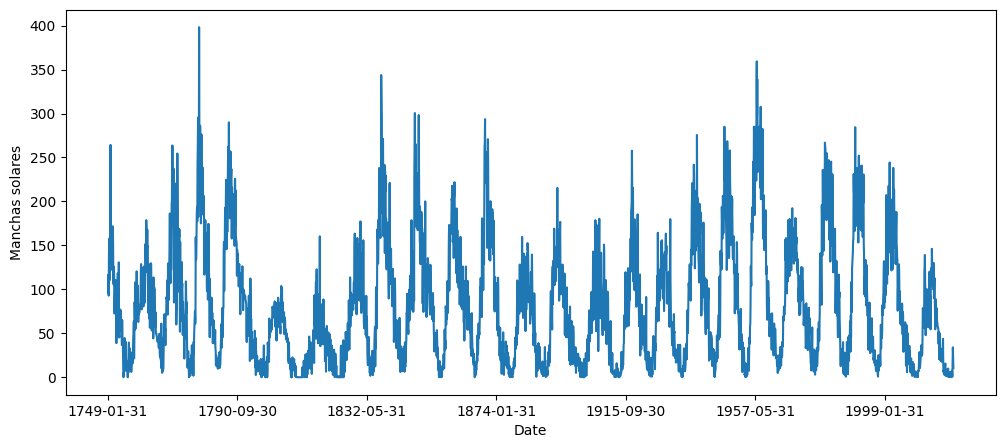

In [2]:
plt.figure(figsize = (12, 5))
df['sunspots'].plot()
plt.ylabel('Manchas solares');

In [3]:
# Division train/test
train_values = np.array(df.loc[:'2016-12-31', 'sunspots'])
test_values = np.array(df.loc['2017-01-31':, 'sunspots'])

# Escalamiento
scaler = MinMaxScaler(feature_range = (0, 1))
train = scaler.fit_transform(train_values.reshape(-1, 1))
test = scaler.transform(test_values.reshape(-1, 1))

# Conversión a datos con tres columnas
from tensorflow.keras.preprocessing import timeseries_dataset_from_array
prev_months = 1
generator = timeseries_dataset_from_array(
    train,
    train,
    sequence_length=prev_months)

In [15]:
# Modelo secuencial
model = Sequential()
# Capa LSTM
model.add(LSTM(units = 50, 
               return_sequences = False # True si la siguiente capa será una capa recurrente
               ))
# Capa de salida
model.add(Dense(units = 1, activation = 'linear'))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')



Epoch 1/100


26/26 [==============================] - 1s 6ms/step - loss: 0.0570
Epoch 2/100
26/26 [==============================] - 0s 6ms/step - loss: 0.0315
Epoch 3/100
26/26 [==============================] - 0s 6ms/step - loss: 0.0209
Epoch 4/100
26/26 [==============================] - 0s 6ms/step - loss: 0.0177
Epoch 5/100
26/26 [==============================] - 0s 6ms/step - loss: 0.0156
Epoch 6/100
26/26 [==============================] - 0s 6ms/step - loss: 0.0134
Epoch 7/100
26/26 [==============================] - 0s 6ms/step - loss: 0.0113
Epoch 8/100
26/26 [==============================] - 0s 6ms/step - loss: 0.0092
Epoch 9/100
26/26 [==============================] - 0s 6ms/step - loss: 0.0073
Epoch 10/100
26/26 [==============================] - 0s 6ms/step - loss: 0.0055
Epoch 11/100
26/26 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 12/100
26/26 [==============================] - 0s 6ms/step - loss: 0.0027
Epoch 13/100
26/26 [=============================

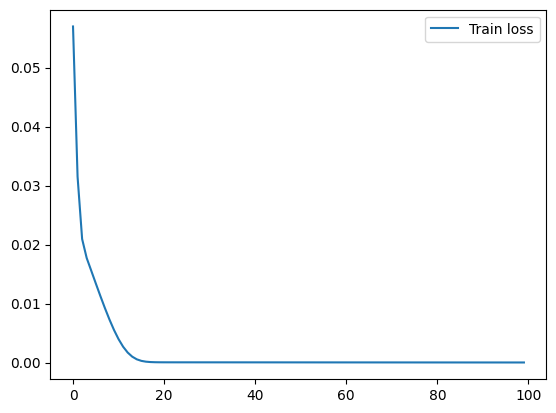

In [16]:
# Compilado

history_lstm = model.fit(generator, epochs=100) # el generador creará los datos en cada iteración

plt.plot(history_lstm.history['loss'], label='Train loss')
plt.legend()

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50)                10400     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# testing
full = np.concatenate((train, test))
test_days = pd.DataFrame(full)[len(full) - len(test) - prev_months:].values
generator_test = timeseries_dataset_from_array(
    test_days,
    test_days,
    sequence_length=prev_months)


1/1 [==============================] - 0s 41ms/step


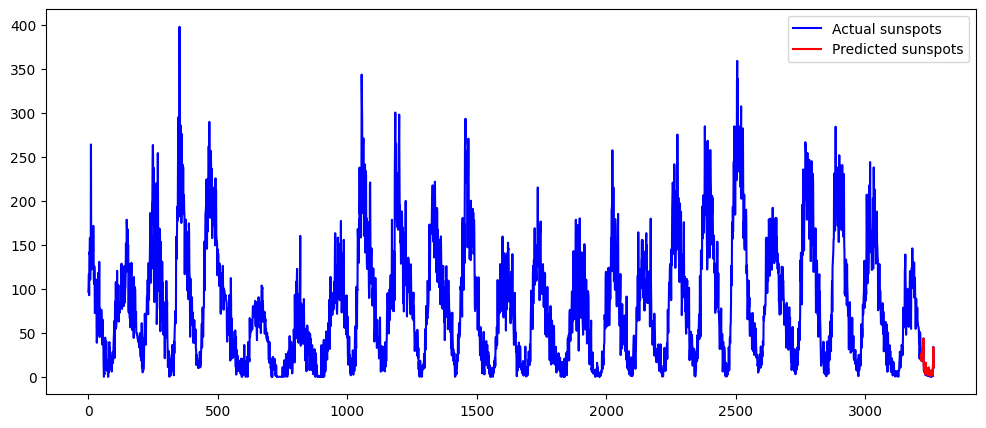

In [64]:
# Primero, grafica toda la serie de tiempo
plt.figure(figsize = (12, 5))
plt.plot(scaler.inverse_transform(full), color='blue', label='Actual sunspots')

# Luego, grafica las predicciones. Necesitarás crear un array de NaN del tamaño de 'full' 
# y luego reemplazar los últimos valores con tus predicciones.
preds_full = np.full_like(full, np.nan)
preds_full[-len(preds):] = preds

plt.plot(scaler.inverse_transform(preds_full), color='red', label='Predicted sunspots')
plt.legend()
plt.show()


# Redes Neuronales Convolucionales (CNN-Convolutional Neural Networks)

- Así como las redes neuronales recurrentes permiten procesar datos temporalmente relacionados, las redes neuronales convolucionales permiten procesar datos espacialmente relacionados.
- Este tipo de redes son utilizadas generalmente para procesar imágenes, donde los pixeles están relacionados espacialmente entre sí.
- En las redes convolucionales, generalmente se utilizan **capas de pooling**. Estas capas se utilizan para reducción de dimensionalidad, disminuyendo la redundancia de datos existente en imágenes (pixeles cercanos generalmente están altamente correlacionados).

In [25]:
# Ejemplo, fuente https://www.tensorflow.org/tutorials/images/cnn
# Bibliotecas
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

170498071/170498071 [==============================] - 11s 0us/step


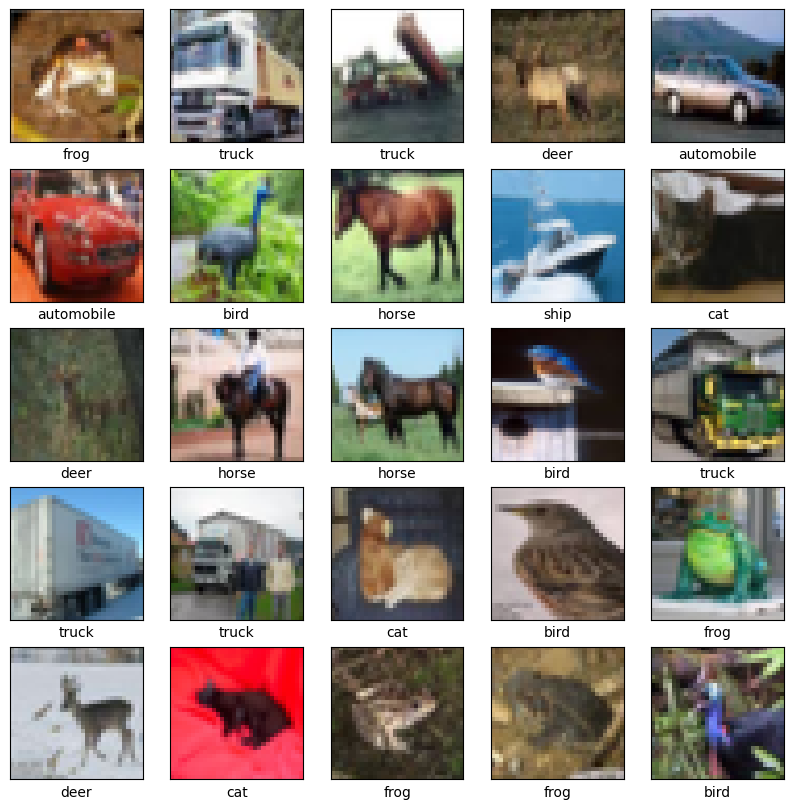

In [26]:
# Datos
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [27]:
train_images.shape

(50000, 32, 32, 3)

In [28]:
# Creación de modelo
model = models.Sequential()
# Capas encargadas de obtener información de la imagen
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Capas para la clasificación en base a la información obtenida en 
# capas anteriores
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [29]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_cnn = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.5217 - accuracy: 0.4463 - val_loss: 1.2779 - val_accuracy: 0.5492
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1587 - accuracy: 0.5866 - val_loss: 1.1168 - val_accuracy: 0.5980
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0253 - accuracy: 0.6390 - val_loss: 1.0011 - val_accuracy: 0.6482
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9301 - accuracy: 0.6740 - val_loss: 0.9430 - val_accuracy: 0.6723
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8539 - accuracy: 0.6997 - val_loss: 0.8673 - val_accuracy: 0.7003
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7966 - accuracy: 0.7213 - val_loss: 0.9319 - val_accuracy: 0.6793
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7436 - accuracy: 0.7382 - val_loss: 0.8551 - 

313/313 - 1s - loss: 0.8579 - accuracy: 0.7117 - 853ms/epoch - 3ms/step


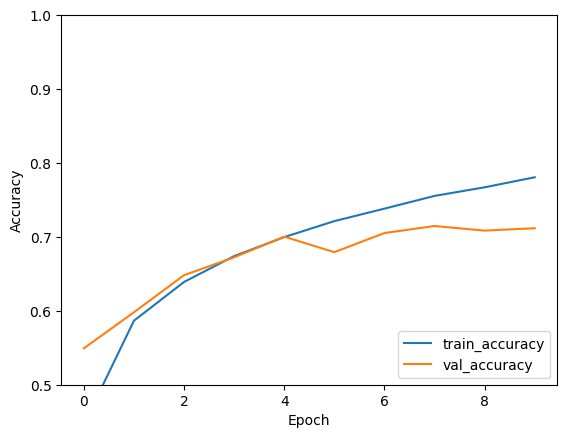

In [30]:
plt.plot(history_cnn.history['accuracy'], label='train_accuracy')
plt.plot(history_cnn.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [75]:
y_pred=model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [76]:
y_pred = np.argmax(y_pred, axis=1)
class_names = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 
               5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}
predicted_class_names = [class_names[i] for i in y_pred]


In [37]:
from sklearn.metrics import classification_report

# Asegúrate de que y_true está definido correctamente
print(classification_report(test_labels, y_pred, target_names=list(class_names.values())))


              precision    recall  f1-score   support

    airplane       0.72      0.71      0.72      1000
  automobile       0.76      0.87      0.81      1000
        bird       0.66      0.61      0.63      1000
         cat       0.56      0.52      0.54      1000
        deer       0.75      0.57      0.65      1000
         dog       0.68      0.57      0.62      1000
        frog       0.73      0.83      0.78      1000
       horse       0.68      0.81      0.74      1000
        ship       0.80      0.81      0.81      1000
       truck       0.75      0.84      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



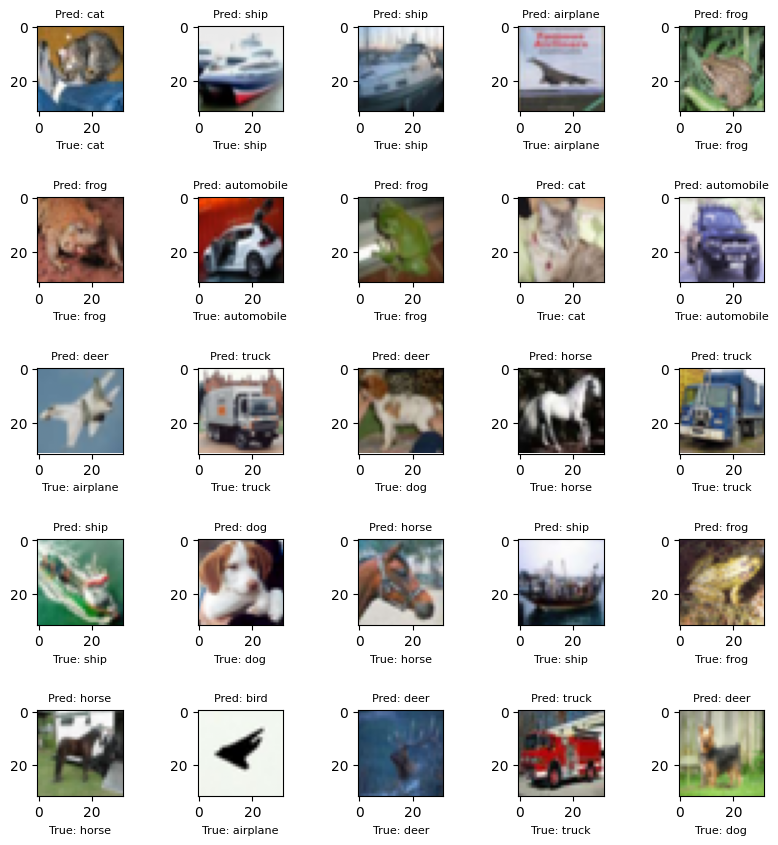

In [78]:
true_class_names = [class_names[i[0]] for i in test_labels]
import matplotlib.pyplot as plt

# Selecciona un número de imágenes para mostrar
num_images_to_show = 20

fig, axes = plt.subplots(5, 5, figsize=(10,10))

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i])
    ax.set_title(f"Pred: {predicted_class_names[i]}", fontsize=8)
    ax.set_xlabel(f"True: {true_class_names[i]}", fontsize=8)

plt.subplots_adjust(hspace=1)

# Elimina la siguiente línea
# plt.tight_layout()

plt.show()



# Actividad 9

- Descargue y analice el dataset presente en el siguiente enlace de Kaggle: https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data
- Cree un modelo capaz de reconocer si una foto corresponde a la foto de un gato o un perro. Para ello, compare distintos modelos y quédese con aquel con mejor desempeño.

In [ ]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")
#codigo extra, para que imagenes de matplotlib
#estén centradas en las diapositivas, ejecutar antes de lanzar los ejemplos.